In [1]:
#KNN CLASSIFICATION

In [2]:
# read in the iris data
from sklearn.datasets import load_iris
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# create x(features) and y(response)
x = iris.data
y = iris.target

In [4]:
# split x and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [6]:
# locating better k value
score=[]
k=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    score.append(metrics.accuracy_score(y_test, y_pred))
    k.append(i)
print(score)

[0.95, 0.95, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.95, 0.95, 0.95, 0.95, 0.9666666666666667, 0.95, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.95]


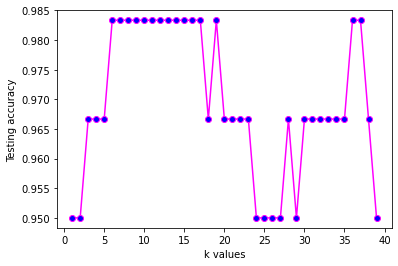

In [7]:
import matplotlib.pyplot as plt
plt.plot(k,score,marker='o',color='magenta', markerfacecolor='b')
plt.xlabel("k values")
plt.ylabel("Testing accuracy")
plt.show()

In [8]:
high_accuracy=max(score)
high_accuracy

0.9833333333333333

In [9]:
best_k=k[score.index(high_accuracy)] 
best_k

6

In [10]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred))*100)

Accuracy: 98.33333333333333


In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[25  0  0]
 [ 0 16  1]
 [ 0  0 18]]


In [13]:
import numpy as np
def predict():
    sl=float(input("sepal-length "))
    sw=float(input("sepal-width "))
    pl=float(input("petal-length "))
    pw=float(input("petal-width "))
    test=np.array([[sl,sw,pl,pw]])
    classifier=knn.predict(test)
    return classifier
classifier=predict()
if(classifier==0):
    print("Iris-Setosa")
elif(classifier==1):
    print("Iris-versicolor")
else:
    print("Iris-virginica")

sepal-length 1.2
sepal-width 4.6
petal-length 6.7
petal-width 2.3
Iris-virginica
